<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab5/lab5solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#task1

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

[[ 1.67235082 -1.66321283]]


array([-0.10198034])

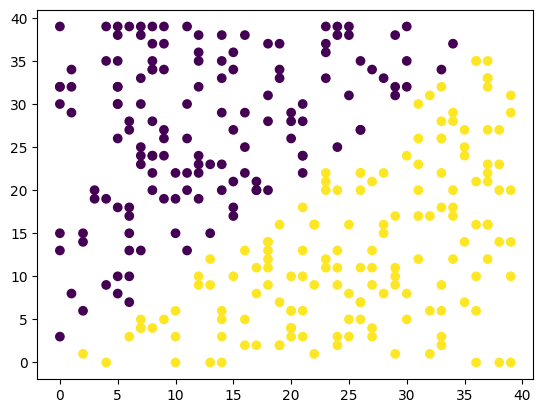

In [3]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows].astype(float)
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression()
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
(inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

In [110]:
# task 5
import numpy as np

class LogisticRegression:
  def __init__(self, bias=False, boundry=0.5, iterations = 1000, learning_rate = 0.01):
    self.bias, self.iterations, self.learning_rate = bias, iterations, learning_rate
    self.sigmoid = lambda z : 1 / (1 + np.exp(-z))
    self.gradient = lambda x, y, coef_ : x.T @ (self.sigmoid(x @ coef_) - y)
    self.boundry = boundry

  def get_params(self, deep=True):
    return {
        'learning_rate': self.learning_rate,
        'iterations': self.iterations,
        'bias': self.bias
    }

  def set_params(self, **params):
      for key, value in params.items():
          setattr(self, key, value)
      return self

  def log_loss(self, x, y):
    y_pred = self.sigmoid( x @ self.coef_)
    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean()

  def fit(self, x, y):
    if self.bias: np.insert(x, 0, 1, axis=1)
    self.coef_ = np.zeros_like(x[0])

    for _ in range(self.iterations):
      self.coef_ -= self.learning_rate * self.gradient(x, y, self.coef_)
    return self

  def predict_proba(self, x):
    out_true = self.sigmoid(x @ self.coef_)
    return np.dstack([out_true, 1 - out_true])[0]

  def predict(self, x):
    if self.bias: np.insert(x, 0, 1, axis=1)
    return np.where(self.sigmoid(x @ self.coef_) > self.boundry, 1, 0)

  def statistics(self, x, y):
    out = self.predict(x)
    outputs = {'False': 1, 'True': 0}
    tp, tn, fp, fn = 0, 0, 0, 0
    for out_i, y_i in zip(out, y):
      if out_i == outputs['True']:
        if y_i == outputs['True']:
          tp += 1
        else:
          fp += 1
      else:
        if y_i == outputs['True']:
          fn += 1
        else:
          tn += 1
    return {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}

  def FPR(self, x, y):
    stats = self.statistics(x, y)
    return stats['FP'] / (stats['FP'] + stats['TN'])

  def score(self, x, y):
    stats = self.statistics(x, y)
    return (stats['TP'] + stats['TN']) / (stats['TP'] + stats['TN'] + stats['FP'] + stats['FN'])

  def accuracy(self, x, y):
    stats = self.statistics(x, y)
    return (stats['TP'] + stats['TN']) / (stats['TP'] + stats['TN'] + stats['FP'] + stats['FN'])

  def precision(self, x, y):
    stats = self.statistics(x, y)
    return stats['TP'] / (stats['TP'] + stats['FP'])

  def recall(self, x, y):
    stats = self.statistics(x, y)
    return stats['TP'] / (stats['TP'] + stats['FN'])

  def f1_score(self, x, y):
    precision = self.precision(x, y)
    recall = self.recall(x, y)
    return 2 * (precision * recall) / (precision + recall)

  def confusion_matrix(self, x, y):
    stats = self.statistics(x, y)
    return np.array([[stats['TN'], stats['FP']], [stats['FN'], stats['TP']]])


In [111]:
from sklearn.datasets import make_classification

In [112]:
model = LogisticRegression().fit(X_data,y_data)

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def picture(model, x, y):
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')  # Зона классификации
  plt.scatter(x[:,0],x[:,1],c = y, cmap='coolwarm');
  plt.title("Граница принятия решения логистической регрессии")
  plt.xlabel('Признак 1')
  plt.ylabel('Признак 2')
  plt.colorbar(label='Класс')
  plt.show()

def roc_curve_picture(model, x, y):
  y_scores = model.predict_proba(x)[:, 0]
  fpr, tpr, thresholds = roc_curve(y, y_scores)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-кривая')
  plt.legend(loc="lower right")
  plt.grid(True)
  plt.show()

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


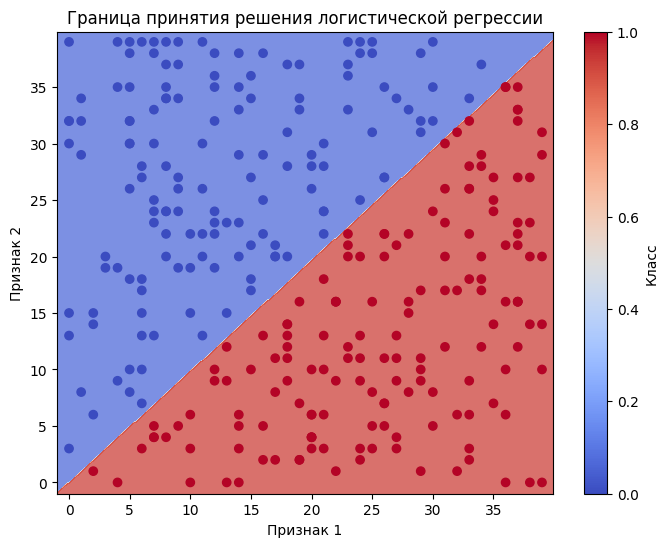

In [133]:
model = LogisticRegression().fit(X_data, y_data)
picture(model, X_data, y_data)

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


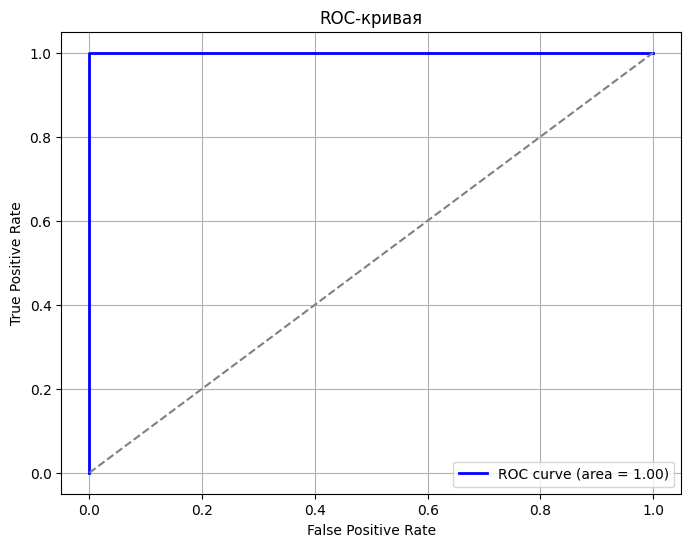

In [134]:
roc_curve_picture(model, X_data, y_data)

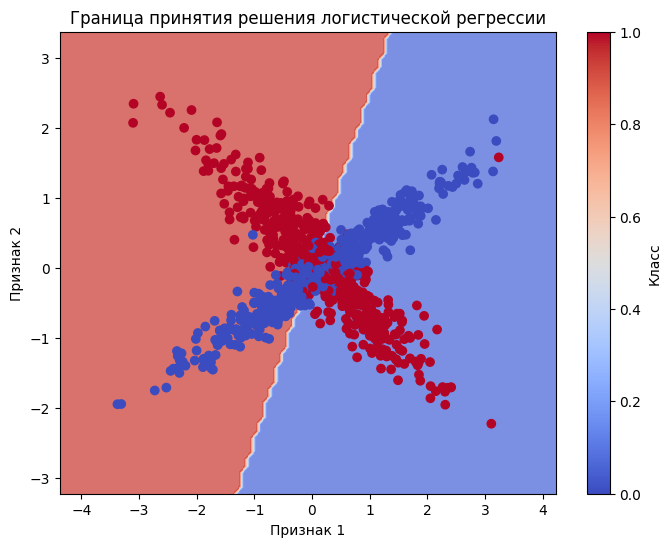

In [135]:
# плохо разделтмые данные
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.1,
    random_state=42
)
model = LogisticRegression().fit(X, y)
picture(model, X, y)

In [136]:
model.score(X, y)

0.511

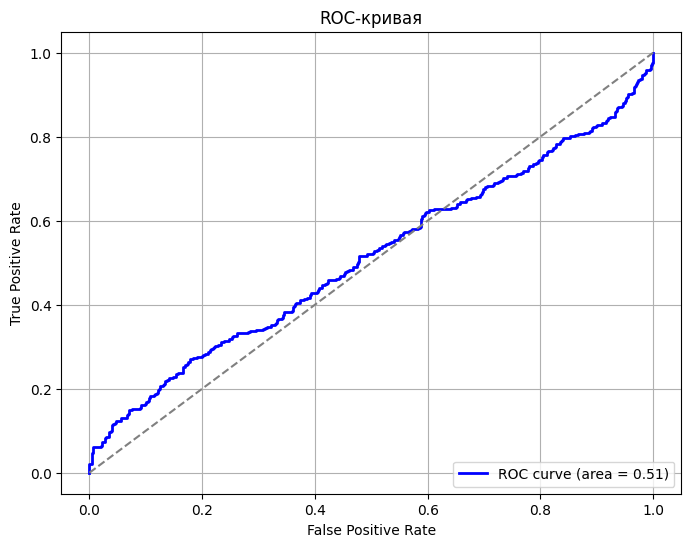

In [137]:
roc_curve_picture(model, X, y)

In [138]:
roc_curve?

In [139]:
#task2

In [102]:
import pandas as pd
from sklearn.model_selection import cross_val_score

In [103]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d mnassrib/telecom-churn-datasets -p /content/sample_data/lab5
!unzip /content/sample_data/lab5/telecom-churn-datasets.zip -d /content/sample_data/lab5

Dataset URL: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
License(s): copyright-authors
  0% 0.00/99.5k [00:00<?, ?B/s]
100% 99.5k/99.5k [00:00<00:00, 22.5MB/s]
Archive:  /content/sample_data/lab5/telecom-churn-datasets.zip
  inflating: /content/sample_data/lab5/churn-bigml-20.csv  
  inflating: /content/sample_data/lab5/churn-bigml-80.csv  


In [140]:
data = pd.read_csv("/content/sample_data/lab5/churn-bigml-80.csv").dropna()

In [141]:
x = pd.get_dummies(data, columns = ["State"]).replace({'No':0, "Yes" : 1}).astype(float).drop(columns = ["Churn"]).values
y = data["Churn"].astype(float).values

<ipython-input-141-8ce05825d253>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = pd.get_dummies(data, columns = ["State"]).replace({'No':0, "Yes" : 1}).astype(float).drop(columns = ["Churn"]).values


In [142]:
#гуд
model = LogisticRegression()
cross_val_score(model, x, y, cv=5, n_jobs=-1).mean()

0.7278643253156819

In [143]:
model.fit(x,y)

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


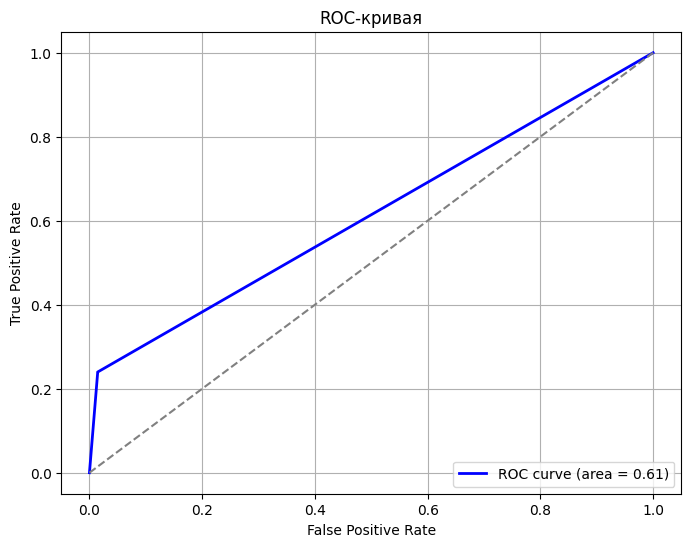

In [144]:
roc_curve_picture(model, x, y)

In [145]:
!kaggle datasets download -d saurabh00007/diabetescsv -p /content/sample_data/lab5
!unzip /content/sample_data/lab5/diabetescsv.zip -d /content/sample_data/lab5

Dataset URL: https://www.kaggle.com/datasets/saurabh00007/diabetescsv
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.5MB/s]
Archive:  /content/sample_data/lab5/diabetescsv.zip
  inflating: /content/sample_data/lab5/diabetes.csv  


In [146]:
data = pd.read_csv("/content/sample_data/lab5/diabetes.csv").dropna()

In [147]:
from sklearn.preprocessing import PolynomialFeatures
x = data.drop(columns = ['Outcome']).values
y = data['Outcome'].values
x = PolynomialFeatures(degree = 3).fit_transform(x)

In [148]:
model = LogisticRegression()
cross_val_score(model, x, y, cv=5, n_jobs=-1).mean()

0.6172226466344113

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


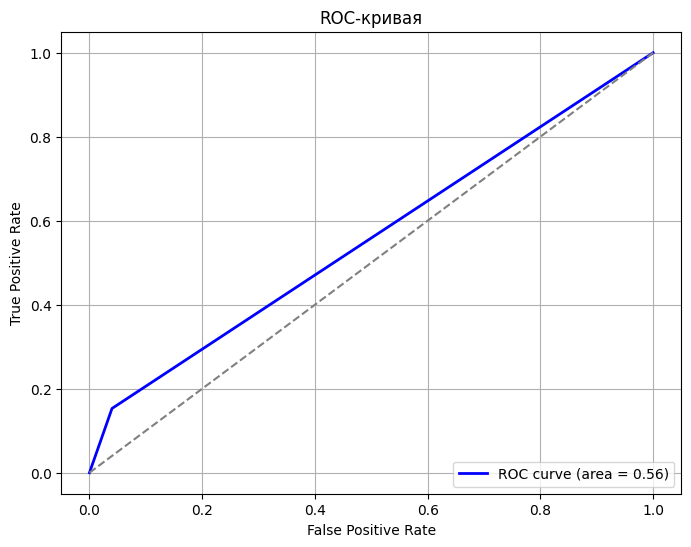

In [150]:
model.fit(x,y)
roc_curve_picture(model, x, y)

In [151]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression -p /content/sample_data/lab5
!unzip /content/sample_data/lab5/heart-disease-prediction-using-logistic-regression.zip -d /content/sample_data/lab5

Dataset URL: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
License(s): unknown
  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 77.9MB/s]
Archive:  /content/sample_data/lab5/heart-disease-prediction-using-logistic-regression.zip
  inflating: /content/sample_data/lab5/framingham.csv  


In [152]:
data = pd.read_csv("/content/sample_data/lab5/framingham.csv").dropna()

In [153]:
x = data.drop(columns = ['TenYearCHD']).values
y = data['TenYearCHD'].values

In [154]:
#гуд
model = LogisticRegression()
cross_val_score(model, x, y, cv=5, n_jobs=-1).mean()

0.8378163007482826

<ipython-input-110-b2112f826fe1>:7: RuntimeWarning: overflow encountered in exp
  self.sigmoid = lambda z : 1 / (1 + np.exp(-z))


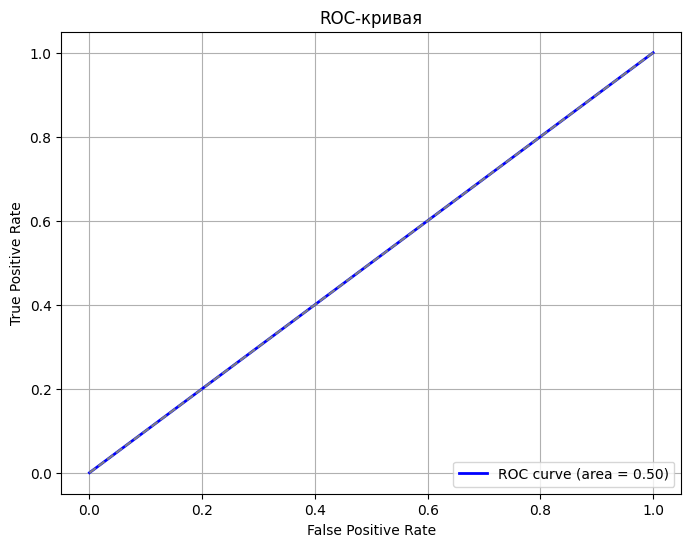

In [155]:
model.fit(x,y)
roc_curve_picture(model, x, y)